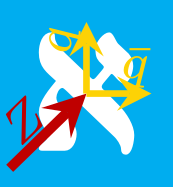

# $\pi^+\pi^-$ resonances in $Z\rightarrow q\bar{q}$ events

In this notebook we will investigate $Z\rightarrow q\bar{q}$ event for the number of $\pi^0$s produced. 

since pions are the lightest mesons ($q_1 \bar{q_2}$ particles), it is possible for heavier mesons and baryons ($q_1 q_2 q_3$ particles) to decay into pairs of pions.   Thus, if we calculate the _invariant mass_ spectrum of all $\pi^{\pm}$ pairs, we should see peeks corresponding to heavier particles - or _resonances_. 

The invariant mass of a $\pi\pi$ pair is calculated as 

$$m_{\mathrm{inv}} = \sqrt{E^2-p^2}\quad,$$ 

where 

\begin{align*} 
  \tilde{p_1} &= \left(p_{1x},p_{1y},p_{1z},E_{1}\right) & \text{First pion four-momentum}\\
  \tilde{p_2} &= \left(p_{2x},p_{2y},p_{2z},E_{2}\right) & \text{Second pion four-momentum}\\
  \tilde{p}   &= \left(p_x,p_y,p_z,E\right) \\
              &= \left(p_{1x}+p_{2x},p_{1y}+p_{2y},p_{1z}+p_{2z},E_1+E_2\right)\\
  p           &= |\vec{p}| = \sqrt{p_x^2+p_y^2+p_z^2}\quad,
\end{align*}

or 

$$m_{\mathrm{inv}} = \sqrt{(E_1+E_2)^2 - \left[(p_{x1}+p_{x2})^2+(p_{y1}+p_{y2})^2+(p_{z1}+p_{z2})^2\right]}\quad.$$
  

This is done in the class `PiPi` (in [`pipi.py`](../pyzqq/pipi.py)). 

Of course, when we form all possible combinations of pairs of photons, we will _also_ make combinations that _do not_ correspond to resonance decays. Some pairs of pions simply does not originate from the same decay. This _background_ is therefore labelled the _combinatorial_ background, and it will be present in the distribution $m_{\mathrm{inv}}$.  

Furthermore, since pions a bosons, i.e., _not_ fermions, they are somewhat attracted to each other in phase-space, as described by Bose-Einstein statistics, and this will also skew the $m_{\mathrm{inv}}$ spectra. 

In this notebook, we will take the invariant mass spectra ($\mathrm{d}N/\mathrm{d}m_{\mathrm{inv}}$) from real _and_ simulated events.  We will try to find resonances in these. 

## Set-up

Before we go on to our analysis, we need to set up a few things. 

First, we modify the load path to allow loading of `pyzqq` code. 

In [1]:
from sys import path 
path.append('..')

We then load a utility to read in the data.  

In [2]:
from pyzqq.utils import loadResults

Use the _MatPlotLib_ Notebook interface. 

In [3]:
%matplotlib notebook 

## The data

Now that we have that utility in place, we can use that to load in the distributions for both real and simulated data. 

In [4]:
da_data = loadResults('zqqdaall.json')
mc_data = loadResults('zqqmcall.json')

Let us plot the invariant mass spectras in those results. 

<IPython.core.display.Javascript object>


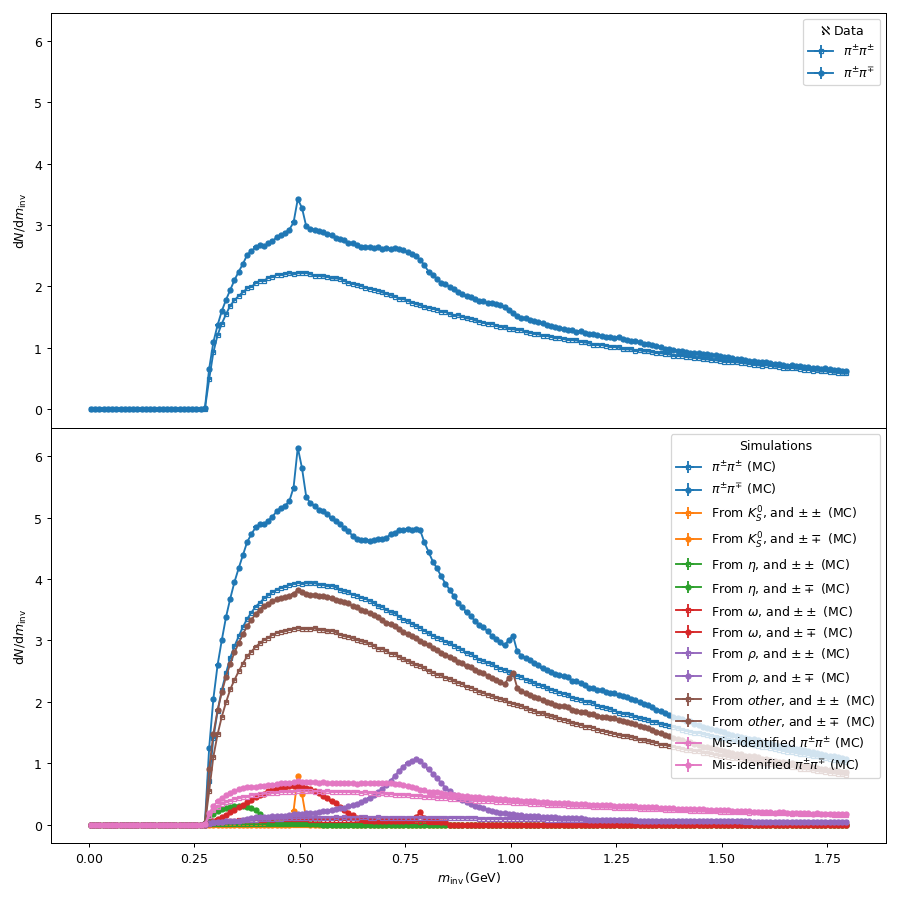

In [5]:
from matplotlib.pyplot import subplots 
from pyzqq import Histogram

fig, ax = subplots(nrows=2,sharex=True,sharey=True,
                   figsize=(10,10),gridspec_kw={'hspace':0})

marker={'opposite': {'marker':'o'},
        'same': {'marker': 's', 'mfc': 'none'}}
col = 0
def popts(name,col):
    cn = f'C{col}'
    o = {'mfc':cn,'mec':cn,'c':cn,'ms':4}
    o.update(marker[name])
    return o

da_nev = da_data['pipi']['nev']
for name, hist in da_data['pipi']['all']['inv_mass'].items():
    hist.plot(ax[0],density=True,nev=da_nev,**popts(name,col))
    #print(name)
    #if name == switch: 
    #    col += 1
    
col = 0
mc_nev = mc_data['pipi']['nev']
for name, hist in mc_data['pipi']['all']['inv_mass'].items():
    hist.plot(ax[1],label=hist.title+' (MC)',density=True,nev=mc_nev,**popts(name,col))
    # print(name)
    #if name == switch: 

for name, sub in mc_data['pipi']['all']['mc'].items():
    col += 1
    for name, hist in sub.items():
        if not isinstance(hist,Histogram): continue 
        hist.plot(ax[1],label=hist.title+' (MC)',density=True,nev=mc_nev,**popts(name,col))

col += 1
for name, hist in mc_data['pipi']['all']['mis'].items():
    hist.plot(ax[1],label=hist.title+' (MC)',density=True,nev=mc_nev,**popts(name,col))    
    if name == 'opposite': 
        col += 10
    
#ax[0].set_yscale('log')
#ax[1].set_yscale('log')
#ax[0].set_ylim(1e-1,3e2)
#ax[1].set_ylim(1e-1,3e2)
ax[0].legend(title=r'$\aleph$ Data')
ax[1].legend(loc='upper right',title='Simulations')
fig.tight_layout();

We see that for real data, we have $\mathrm{d}N/\mathrm{d}m_{\mathrm{inv}}$ spectra for all $\pi^{\pm}\pi^{\mp}$ i.e., _opposite_ charge, and $\pi^{\pm}\pi^{\pm}$ i.e., _same_ charge, pion pairs.  The same-charge spectrum shows a charactistic combinatorical background shape. 

For simulated data, we have the same two spectra, but _also_ a number of $\mathrm{d}N/\mathrm{d}m_{\mathrm{inv}}$ for specific combinations: 

- Where one parent particle of either pion is a $K^0$ 
- Where one parent particle of either pion is a $\eta$ (or $\eta'$)
- Where one parent particle of either pion is a $\omega$ 
- Where one parent particle of either pion is a $\rho$ 
- Where one parent particle of either pion is another particle (_not_ a $K^0$, $\eta$, $\eta'$, $\omega$, nor $\rho$) 
- Where one of the pions have been mis-identified in the reconstruction 

Let us extract our data into some convinient structures 

In [6]:
def get_pair(data,nev):
    return { 
        'same': data['same'].asGraph(density=True,nev=nev),
        'oppo': data['opposite'].asGraph(density=True,nev=nev)
    }
def get_basic(data):
    nev = data['pipi']['nev']
    return get_pair(data['pipi']['all']['inv_mass'], nev)
    
da = get_basic(da_data)
da

{'same': $\pi^{\pm}\pi^{\pm}$, 'oppo': $\pi^{\pm}\pi^{\mp}$}

When we use the member function `Histogram.asGraph` with the option `density=True` and `nev=nev`, then we get back the spectra $\mathrm{d}N/\mathrm{d}m_{\mathrm{inv}}$.  That is, the "y" values of each bin is the sum of counts in that bin divided by the bin-width and the number of events accepted. 

In [7]:
def get_mc(data):
    nev = data['pipi']['nev']
    ret = get_basic(data)
    
    for name, sub in data['pipi']['all']['mc'].items():
        ret[name] = get_pair(sub,nev)
        
        
    ret['mis'] = get_pair(data['pipi']['all']['mis'],nev)
        
    return ret 

mc = get_mc(mc_data)

The objects stored in the associative arrays (or "maps") `da` and `mc` are `Graph` objects which can give us correlated pairs of $m_{\mathrm{inv}}$ and  $\mathrm{d}N/\mathrm{d}m_{\mathrm{inv}}$ as well as their associated uncertainties. 

## Subtract the background 

As mentioned above, a challenge with the data we have is the combinatorial background in our invariant mass spectra.   Since we do not expect resonance decays in the same-sign spectra ($\pm\pm$), one way to subtract the background is to subtract the $\pm\pm$ spectrum from the same $\pm\mp$ spectrum.  Let us do that for the data we just extracted above. 

<IPython.core.display.Javascript object>


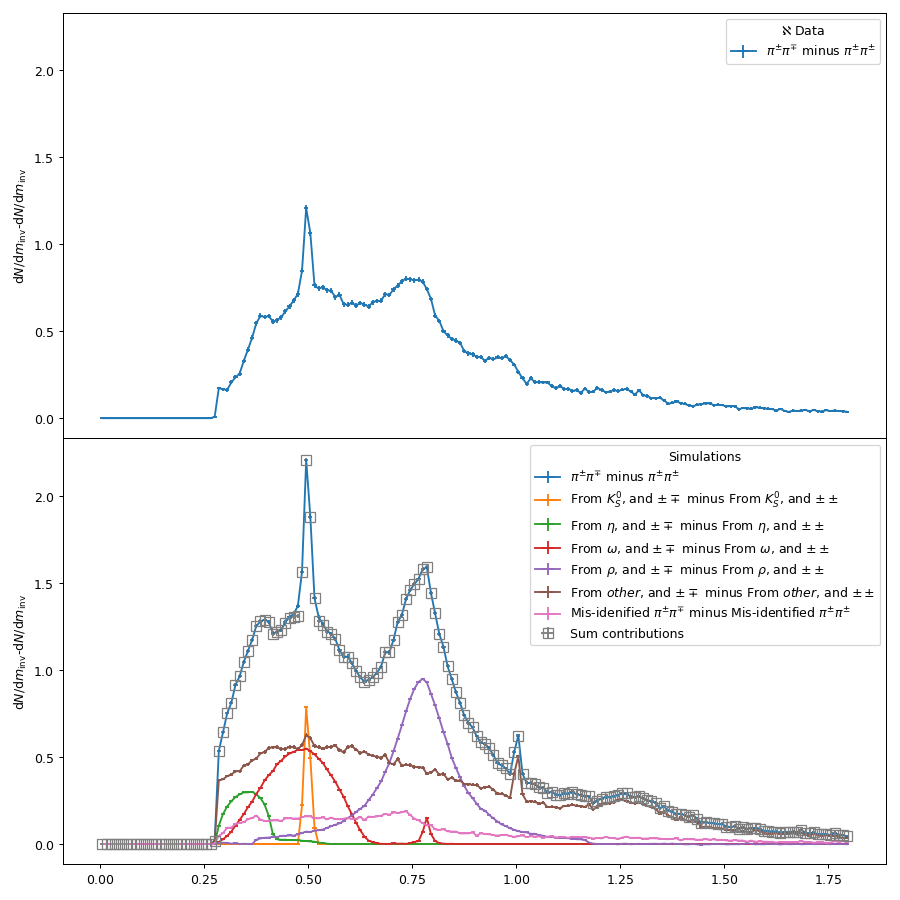

In [8]:
from pyzqq import Graph
from numpy import zeros_like
fig, ax = subplots(nrows=2,sharex=True,sharey=True,
                   figsize=(10,10),gridspec_kw={'hspace':0})

da_diff = Graph.difference(da['oppo'],da['same'])
da_diff.plot(ax=ax[0])
da['diff'] = da_diff

mc_diff = Graph.difference(mc['oppo'],mc['same'])
mc_sum  = Graph(mc_diff.x,
                zeros_like(mc_diff.y),
                mc_diff.ex,
                zeros_like(mc_diff.ey))
mc_diff.plot(ax=ax[1])
mc['diff'] = mc_diff 
for k,p in mc.items():
    if k in ['same','oppo','diff']:
        continue 
        
    d = Graph.difference(p['oppo'],p['same'])
    d.plot(ax=ax[1])
    mc[k]['diff'] = d
    mc_sum = Graph.sum(mc_sum,d)
    
mc_sum.title = 'Sum contributions'
mc_sum.plot(ax=ax[1],marker='s',mfc='none',ms=8,ls='none')
ax[1].set_ylabel(mc_diff.yLabel)
    
ax[0].legend(title=r'$\aleph$ Data')
ax[1].legend(title='Simulations')
fig.tight_layout()

In the simulated data plot (lower panel), the curve _Sum contributions_ is the sum of contributions from $K^0$, $\eta$, $\omega$, $\rho$ and _other_.  As we can see, this exactly describes the observed spectrum of invariant masses.   We will use that to do a _template fit_ to our data. 

## Template fit 

The method of _template fitting_ is extensively described in Chapter 18 of [Statistics Overview - With Python](https://cholmcc.gitlab.io/nbi-python/statistics/#Statistik) (the books is freely - as in beer _and_ speach - available in both English and Danish).   In that book a number of tools for performing template fits are developed, and we will use those here.   The tools are available in the Python module [`nbi_stat`](https://cholmcc.gitlab.io/nbi-python/statistics/nbi_stat/index.html).   The module can be installed by executing 

    pip install nbi_stat 

We refer to the above mentioned book for a more in-depths explanation of what template fitting is all about.  Here, we will simply stay that template fitting is 

> Instead of fitting analytical expression to observations, we fit pre-determined empirical
> distributions to the observations.

In our case the _observations_ is the background subtracted invariant mass spectrum, and the _pre-determined empirical distributions_ are the background-subtracted invariant mass spectra from known sources as obtained in simulations - our templates. 

Following the book above, we need to define a probability density function from our templates.  First, we extrat the templates, the background-corrected spectra, from the simulation data.

In [9]:
comp  = {k: s['diff'] for k, s in mc.items() 
         if k not in ['diff','oppo','same'] }

Then, we define scaled, probability density functions (PDFs) from the templates via `histo_pdf` and `scaled_pdf`.

In [10]:
from nbi_stat import histo_pdf, scale_pdf
funcs = [scale_pdf()(histo_pdf(g.x,g.y,kind='nearest'))
         for k, g in comp.items()]

Now we can define our model function which is scaled sum of all the template PDFs.  Note that we set the parameter names and default initial parameters as attributes on the function. 

In [11]:
def model(x,*p):
    from numpy import abs
    return sum([f(x,pp) for f,pp in zip(funcs,abs(p))])
        
model.p0 = [1]*len(funcs)
model.parNames = [f'A_{{{k}}}' for k in comp.keys()]

Before we go on, let us draw this model function with default parameters  $\vec{p}_0=\vec{1}$. 

<IPython.core.display.Javascript object>


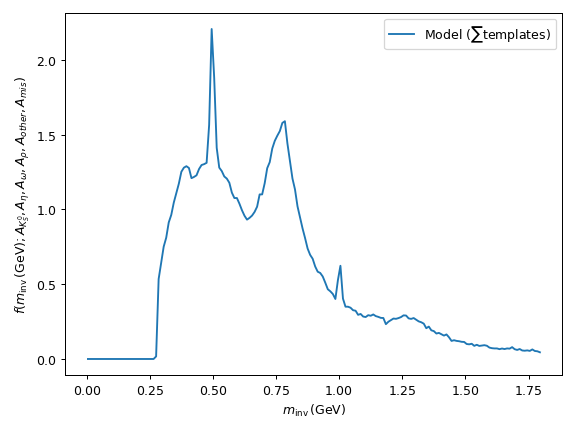

In [12]:
fig, ax = subplots(ncols=1)
ax.plot(mc['oppo'].x,model(mc['oppo'].x,*model.p0),
        label=r'Model ($\sum\mathrm{templates}$)')
ax.set_xlabel(mc['oppo'].xLabel)
ax.set_ylabel(f'$f({mc["oppo"].xLabel[1:-1]};'
              f'{",".join(model.parNames)})$');
ax.legend()
fig.tight_layout()

We can now use a _Binned Maximum Likelihood Estimate_ (B-MLE) to estimate the parameters $A_{\cdot}$.  We need to mask out zero values from our data as it would otherwise cause floating point exceptions. For the B-MLE we need to get back the bin edges so that we can calulate the intergral in each bin, as this is the probabily of that bin. 

In [13]:
from numpy import append
m  = da['diff'].mask(.27,1.8)
x  = da['diff'].x [m] 
y  = da['diff'].y [m] 
ey = da['diff'].ey[m]
ex = da['diff'].ex[m] 
bn = append(x-ex, x[-1]+ex[-1])

We then set our inital parameter values, get the parameter names, and set the boundary $A_{\cdot}\in[0,\infty)$ on all parameters, or scales on the templates.  We then use the function `mle_fit` from `nbi_stat` to do the B-MLE. 

In [14]:
from nbi_stat import mle_fit, fit

p0 = [*model.p0]
bd = [(0,None)]*len(p0)
pn = [*model.parNames]
p, cov, opt = mle_fit(model,(bn,y),p0,
                      extended=len(p0)>len(model.p0),
                      poisson=True,
                      options={'disp':False},
                      full_output=True)
#opt

Let us plot the data and the fit.  Note that a B-MLE does not calculate the $\chi^2$ as part of the optimisation, but we can calculate it afterwards from the found parameter values. 

<IPython.core.display.Javascript object>


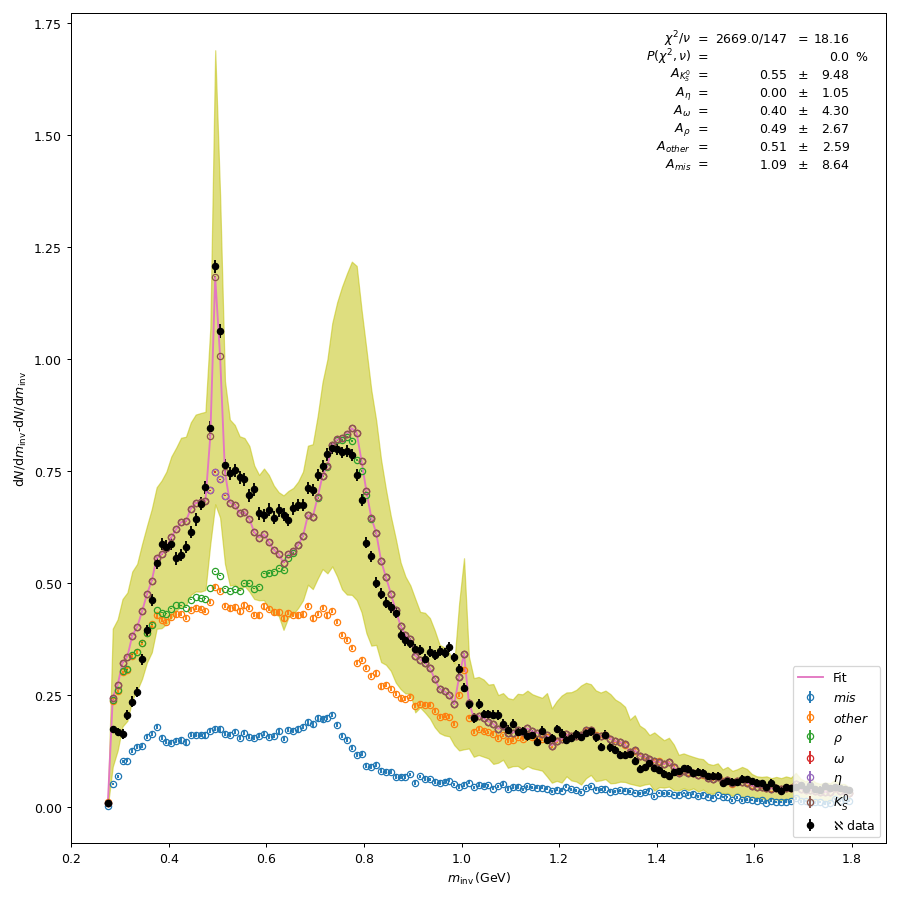

In [15]:
def template_fit_plot(x,y,ey,f,p,cov,templates):
    from nbi_stat import fit_plot
    from numpy import abs 

    fig, ax = subplots(ncols=1,figsize=(10,10))
    base    = zeros_like(y)
    pR      = abs(p[::-1])
    kk      = list(templates.keys())[::-1]
    gg      = list(templates.values())[::-1]
    for pv,k,g in zip(pR,kk,gg):
         ax.errorbar(g.x[m],g.y[m]*pv+base,g.ey[m]*pv,
                     fmt='o',label=f'${k}$',mfc='none',ms=5)
         base += pv*g.y[m]

    fit_plot(x,y,ey,f,abs(p),cov,axes=ax,
             parameters=f.parNames,
             data={'fmt':'o','label':r'$\aleph$ data',
                   'markersize':5,'color':'k',},
             fit={'label':'Fit'},
             chi2=True,
             nsig=3,
             legend={'loc':'lower right'})
    ax.set_xlabel(da['diff'].xLabel)
    ax.set_ylabel(da['diff'].yLabel)
    fig.tight_layout()
        
template_fit_plot(x,y,ey,model,p,cov,comp)

As we can see, the fit is not terribly good.  In fact, we see 
- very large uncertainties on the scale parameters, 
- there is no contribution from $\eta$ mesons, and 
- the contribtion from mis-identified $\pi$'s is twice as a large as other contributions, relative to the   simulations. 

However, we _have_ parameterised the known contributions to the invariant mass spectrum.  Let us plot the scaled templates and then the data with these scaled templates subtracted.  We construct a new spectrum from the scaled templates.  Here, we use the Python function `reduce` to do the heavy-lifting for us. 

In [16]:
from functools import reduce

g = Graph(da['diff'].x,
          zeros_like(da['diff'].y),
          da['diff'].ex,
          zeros_like(da['diff'].ey),
          title='Fitted templates')
g = reduce(lambda g,fo: Graph.sum(g,fo[1],1,fo[0]),zip(p,comp.values()),g)
g.title = 'Fitted templates'
g.yLabel = r'$\sum_i A_i \mathrm{d}N_i/\mathrm{d}m_{\mathrm{inv}}$'

We plot the scaled templates and data together, and calculate the residue of subtracting the scaled templates from the data. 

<IPython.core.display.Javascript object>


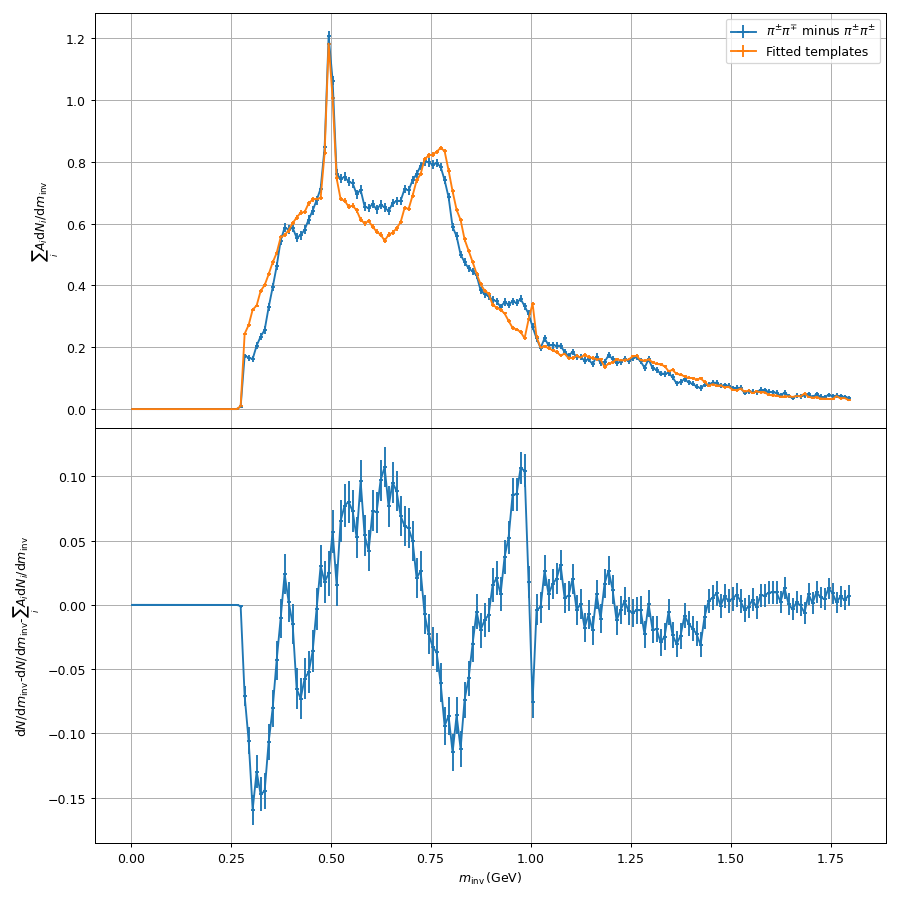

In [17]:
fig, ax = subplots(nrows=2,sharex=True,gridspec_kw={'hspace':0},
                   figsize=(10,10))
da['diff'].plot(ax[0])
g.plot(ax[0])

residue = Graph.difference(da['diff'],g)
residue.plot(ax[1])

ax[0].legend()
ax[0].grid()
ax[1].grid()
fig.tight_layout()

The above residuals sugggests that perhaps something is missing in our templates.  We will therefore _add_ another template to our templates - one that is centred around the abundance near $m_{\mathrm{inv}}=0.65$ and around $m_{\mathrm{inv}}=0.9$.   Of course, we will do this in a fairly quantitive maner below. 

Let us try to fit a normal distribution to the residual data around the two places of abundance. 

<IPython.core.display.Javascript object>


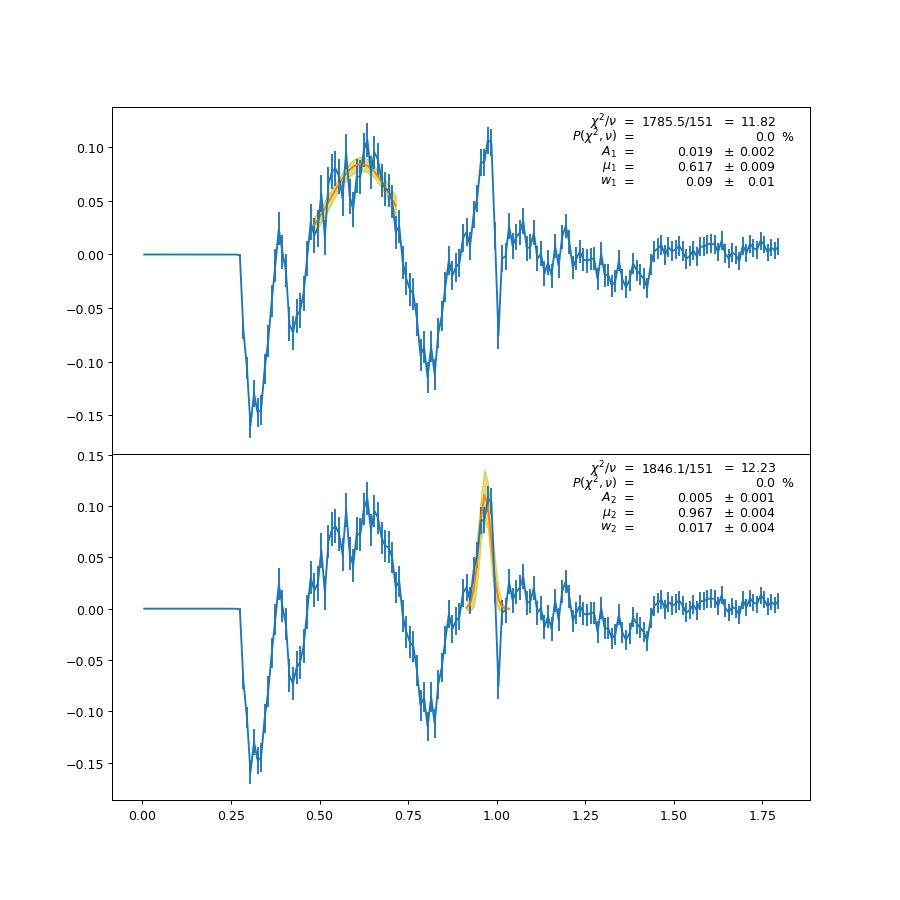

In [18]:
from scipy.stats import norm
from numpy import logical_and 
from nbi_stat import fit_plot

@scale_pdf()
def fn(x,*args):
    return norm.pdf(x,*args)


def get_lim(x,y,l,h):
    xx = x[logical_and(y>0,logical_and(x>l,x<h))]
    return xx.min(), xx.max()

l1,h1      = get_lim(residue.x,residue.y,.4,.8)
m1         = residue.mask(l1,h1)
xp1, xcov1 = fit(fn,residue.x[m1],residue.y[m1],(1,0.65,.05),residue.ey[m1])

l2,h2      = get_lim(residue.x,residue.y,.75,1.05)
m2         = residue.mask(l2,h2)
xp2, xcov2 = fit(fn,residue.x[m2],residue.y[m2],(1,0.85,.05),residue.ey[m2])

fig, ax = subplots(nrows=2,sharex=True,gridspec_kw={'hspace':0},figsize=(10,10))
fit_plot(residue.x,residue.y,residue.ey,fn,xp1,xcov1,axes=ax[0],xeval=residue.x[m1],
         parameters=['A_1',r'\mu_1',r'w_1'])
fit_plot(residue.x,residue.y,residue.ey,fn,xp2,xcov2,axes=ax[1],xeval=residue.x[m2],
         parameters=['A_2',r'\mu_2',r'w_2']);

We see that we could add two templates  

\begin{align*}
  T_1 &\sim N[0.62,0.1]\\
  T_2 &\sim N[0.97,0.2]\quad,
\end{align*} 

which will hopefully allow us to do a better fit to the data.  These two templates will of course correspond to some resonance particle not accounted for in the simulated spectra.  We can use the particle database from `pyzqq` to look for which particles these could be. 

In [19]:
from pyzqq.particlesdb import ParticleDB
from IPython.display import Latex

byMass  = [[p['mass'],pdg] for pdg,p in ParticleDB.byPDG.items()]
t1_cand = [pdg for m,pdg in byMass if 0.61 < m < 0.63]
t2_cand = [pdg for m,pdg in byMass if 0.95 < m < 0.99]
t1_nams = ','.join([ParticleDB.name(pdg) for pdg in t1_cand])
t2_nams = ','.join([ParticleDB.pretty(pdg) for pdg in t2_cand])
display(Latex(('$T_1$ candidates: $'+(r'\mathrm{none}' if len(t1_nams)<1 else t1_nams) +'$')))
display(Latex(('$T_2$ candidates: $'+(r'\mathrm{none}' if len(t2_nams)<1 else t2_nams)+'$')))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

That is, the template $T_2$ will likely correspond to $\eta'$ particles, a $dd$ bound state, or perhaps $a$-mesons.  The most reasonable seem to be $\eta'$ though.   However, $T_1$ does not have an obvious known candidate.  

With this in mind, we will add our templates.  We will build these two templates using the same statistics as used in the simulations. 

<IPython.core.display.Javascript object>


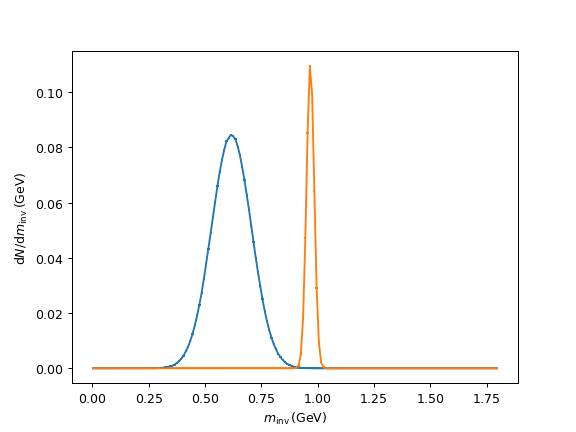

In [20]:
from pyzqq import Histogram

bh = mc_data['pipi']['all']['inv_mass']['opposite']
h1 = Histogram(bh.binEdges,title='$X_1$',xLabel=bh.xLabel)
h2 = Histogram(bh.binEdges,title='$X_2$',xLabel=bh.xLabel)
h1.fill(norm.rvs(xp1[1],xp1[2],size=mc_nev))
h2.fill(norm.rvs(xp2[1],xp2[2],size=mc_nev))

fig, ax = subplots(ncols=1)
h1.plot(ax,density=True,scale=mc_nev/xp1[0])
h2.plot(ax,density=True,scale=mc_nev/xp2[0])

Let us now build a new template function including these two templates.  We plot our new template model togther with the old to see the difference. 

<IPython.core.display.Javascript object>


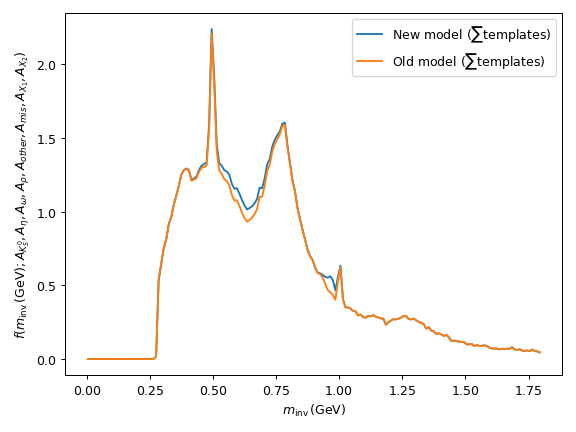

In [21]:
mc2    = {**mc,
          h1.title[1:-1]: {"diff":h1.asGraph(density=True,scale=mc_nev/xp1[0])},
          h2.title[1:-1]: {"diff":h2.asGraph(density=True,scale=mc_nev/xp2[0])},
         }

comp2  = {k: s['diff'] for k, s in mc2.items() 
          if k not in ['diff','oppo','same'] }

funcs2 = [scale_pdf()(histo_pdf(g.x,g.y,kind='nearest'))
          for k, g in comp2.items()]

def model2(x,*p):
    from numpy import abs
    return sum([f(x,pp) for f,pp in zip(funcs2,abs(p))])
        
model2.p0 = [1]*len(funcs2)
model2.parNames = [f'A_{{{k}}}' for k in comp2.keys()]

fig, ax = subplots(ncols=1)
ax.plot(mc['oppo'].x,model2(mc['oppo'].x,*model2.p0),
        label=r'New model ($\sum\mathrm{templates}$)')
ax.plot(mc['oppo'].x,model(mc['oppo'].x,*model.p0),
        label=r'Old model ($\sum\mathrm{templates}$)')
ax.set_xlabel(mc['oppo'].xLabel)
ax.set_ylabel(f'$f({mc["oppo"].xLabel[1:-1]};'
              f'{",".join(model2.parNames)})$');
ax.legend()
fig.tight_layout()

We then reperform our B-MLE fit. 

In [22]:
p02 = [*model2.p0]
bd  = [(0,None)]*len(p02)
pn  = [*model2.parNames]
p2, cov2, opt = mle_fit(model2,(bn,y),p02,
                        extended=len(p02)>len(model2.p0),
                        poisson=True,
                        options={'disp':False},
                        full_output=True,
                      )
#opt

<IPython.core.display.Javascript object>


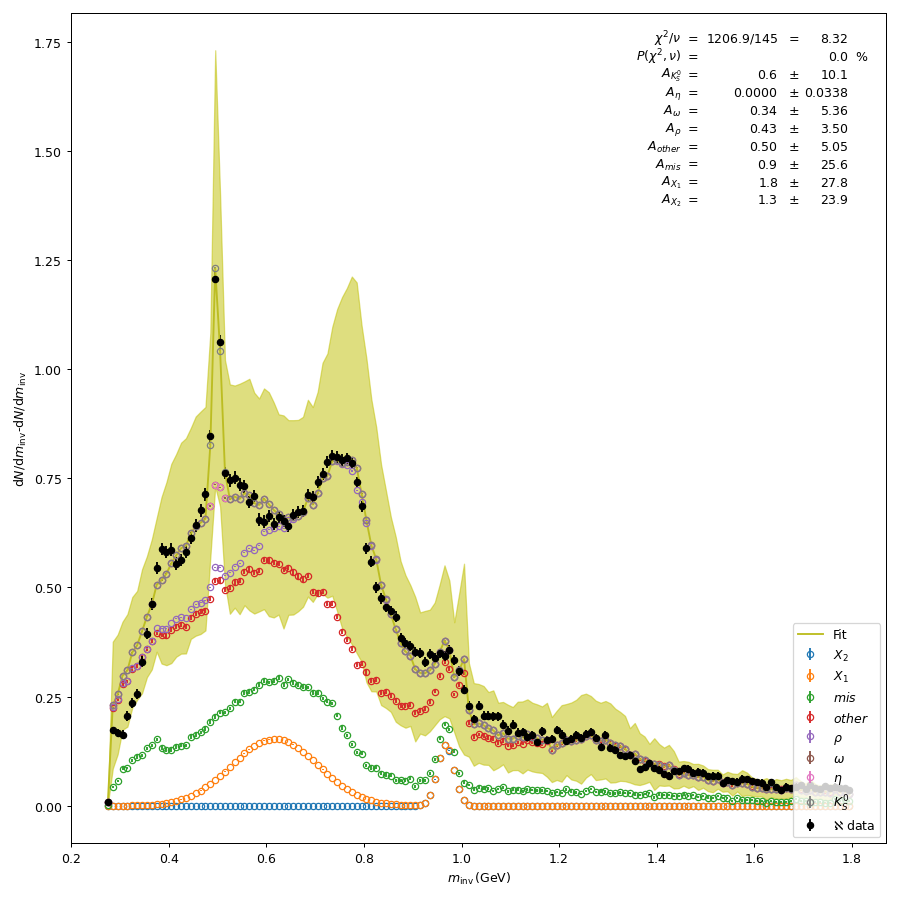

In [23]:
template_fit_plot(x,y,ey,model2,p2,cov2,comp2)

The fit to the new templates, including $T_1$ and $T_2$ _is_ a little better than the previous fit ($\chi^2/\nu=8.32$ versus the previous value of $\chi^2/\nu=18.16$).   The quesion is, if the alternate hypothesis of $T_1$ and $T_2$ does better than the null hypothesis. 